<a href="https://colab.research.google.com/github/shrinidhib/dsbdal/blob/main/dsbdal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch
!pip install pandas numpy transformers scikit-learn matplotlib yfinance tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [66]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
d21_22 = pd.read_csv("21-22.csv")
d23_24 = pd.read_csv("23-24.csv")
d25_26 = pd.read_csv("25-26.csv")

In [4]:
df = pd.concat([d21_22, d23_24, d25_26], ignore_index=True)

In [5]:

df.drop(columns=['bill_id', 'session_id', 'bill_number', 'status', 'status_desc', 'committee_id', 'committee', 'last_action_date', 'last_action', 'url', 'state_link'], axis=1, inplace=True)
df.head()

,status_date,title,description
0,2021-03-11,Voter Registration Modernization Act of 2021 V...,"To expand Americans’ access to the ballot box,..."
1,2021-01-03,Reserved for the Speaker.,Reserved for the Speaker.
2,2021-04-22,Elijah E. Cummings Lower Drug Costs Now Act,"To establish a fair price negotiation program,..."
3,2021-09-14,John R. Lewis Voting Rights Advancement Act of...,To amend the Voting Rights Act of 1965 to revi...
4,2021-03-01,Equality Act,To prohibit discrimination on the basis of sex...


In [ ]:

df['Date']=df['status_date']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41339 entries, 0 to 41338
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status_date  41339 non-null  object
 1   title        41339 non-null  object
 2   description  41339 non-null  object
 3   Date         41339 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [7]:
df = df[df['description'] != 'Reserved for the Speaker.']
df = df[df['title'] != 'Reserved for the Speaker.']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41330 entries, 0 to 41338
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   status_date  41330 non-null  object        
 1   title        41330 non-null  object        
 2   description  41330 non-null  object        
 3   Date         41330 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 1.6+ MB


In [6]:
df['Date']=pd.to_datetime(df['status_date'])

In [9]:
sensex = yf.download('^BSESN', start=df['Date'].min(), end=df['Date'].max())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [10]:
sensex.head()

Price,Close,High,Low,Open,Volume
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN
Date,,,,,
2021-01-04,48176.800781,48220.468750,47594.468750,48109.171875,13900
2021-01-05,48437.781250,48486.238281,47903.378906,48037.628906,12200
2021-01-06,48174.058594,48616.660156,47864.140625,48616.660156,22500
2021-01-07,48093.320312,48558.339844,48037.871094,48524.359375,18400
2021-01-08,48782.511719,48854.339844,48365.578125,48464.910156,22200


In [11]:
sensex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2021-01-04 to 2025-03-26
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, ^BSESN)   1043 non-null   float64
 1   (High, ^BSESN)    1043 non-null   float64
 2   (Low, ^BSESN)     1043 non-null   float64
 3   (Open, ^BSESN)    1043 non-null   float64
 4   (Volume, ^BSESN)  1043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 48.9 KB


In [12]:
sensex = sensex[['Close']]


In [13]:
sensex.head()

Price,Close
Ticker,^BSESN
Date,
2021-01-04,48176.800781
2021-01-05,48437.781250
2021-01-06,48174.058594
2021-01-07,48093.320312
2021-01-08,48782.511719


In [14]:
sensex = sensex.reset_index()
sensex.columns = ['Date', 'Sensex']

In [15]:
merged_df = pd.merge(df, sensex, on='Date', how='left')


In [16]:

merged_df.head()

,status_date,title,description,Date,Sensex
0,2021-03-11,Voter Registration Modernization Act of 2021 V...,"To expand Americans’ access to the ballot box,...",2021-03-11,NaN
1,2021-04-22,Elijah E. Cummings Lower Drug Costs Now Act,"To establish a fair price negotiation program,...",2021-04-22,48080.671875
2,2021-09-14,John R. Lewis Voting Rights Advancement Act of...,To amend the Voting Rights Act of 1965 to revi...,2021-09-14,58247.089844
3,2021-03-01,Equality Act,To prohibit discrimination on the basis of sex...,2021-03-01,49849.839844
4,2021-03-22,Dream Act of 2021 American Promise Act of 2021,To authorize the cancellation of removal and a...,2021-03-22,49771.289062


In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41330 entries, 0 to 41329
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   status_date  41330 non-null  object        
 1   title        41330 non-null  object        
 2   description  41330 non-null  object        
 3   Date         41330 non-null  datetime64[ns]
 4   Sensex       39055 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.6+ MB


In [18]:
merged_df = merged_df.dropna()


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39055 entries, 1 to 41324
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   status_date  39055 non-null  object        
 1   title        39055 non-null  object        
 2   description  39055 non-null  object        
 3   Date         39055 non-null  datetime64[ns]
 4   Sensex       39055 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.8+ MB


In [20]:
merged_df['Sensex Prev'] = merged_df['Sensex'].shift(1)
merged_df['Sensex Change (%)'] = ((merged_df['Sensex'] - merged_df['Sensex Prev']) / merged_df['Sensex Prev']) * 100


In [21]:
merged_df.head()

,status_date,title,description,Date,Sensex,Sensex Prev,Sensex Change (%)
1,2021-04-22,Elijah E. Cummings Lower Drug Costs Now Act,"To establish a fair price negotiation program,...",2021-04-22,48080.671875,NaN,NaN
2,2021-09-14,John R. Lewis Voting Rights Advancement Act of...,To amend the Voting Rights Act of 1965 to revi...,2021-09-14,58247.089844,48080.671875,21.144501
3,2021-03-01,Equality Act,To prohibit discrimination on the basis of sex...,2021-03-01,49849.839844,58247.089844,-14.416600
4,2021-03-22,Dream Act of 2021 American Promise Act of 2021,To authorize the cancellation of removal and a...,2021-03-22,49771.289062,49849.839844,-0.157575
5,2021-04-19,Paycheck Fairness Act,To amend the Fair Labor Standards Act of 1938 ...,2021-04-19,47949.421875,49771.289062,-3.660478


In [22]:
merged_df = merged_df.dropna()

In [23]:
merged_df.head()

,status_date,title,description,Date,Sensex,Sensex Prev,Sensex Change (%)
2,2021-09-14,John R. Lewis Voting Rights Advancement Act of...,To amend the Voting Rights Act of 1965 to revi...,2021-09-14,58247.089844,48080.671875,21.144501
3,2021-03-01,Equality Act,To prohibit discrimination on the basis of sex...,2021-03-01,49849.839844,58247.089844,-14.416600
4,2021-03-22,Dream Act of 2021 American Promise Act of 2021,To authorize the cancellation of removal and a...,2021-03-22,49771.289062,49849.839844,-0.157575
5,2021-04-19,Paycheck Fairness Act,To amend the Fair Labor Standards Act of 1938 ...,2021-04-19,47949.421875,49771.289062,-3.660478
14,2021-02-05,No Taxpayer Funding for Abortion and Abortion ...,To prohibit taxpayer funded abortions.,2021-02-05,50731.628906,47949.421875,5.802379


In [24]:

merged_df.sort_values(by="Date")

,status_date,title,description,Date,Sensex,Sensex Prev,Sensex Change (%)
9702,2021-01-04,Adopting the Rules of the House of Representat...,Adopting the Rules of the House of Representat...,2021-01-04,48176.800781,60927.429688,-20.927567
129,2021-01-04,David’s Law David Ray Hate Crimes Prevention A...,"To enhance Federal enforcement of hate crimes,...",2021-01-04,48176.800781,48176.800781,0.000000
130,2021-01-04,Coretta Scott King Mid-Decade Redistricting Pr...,To prohibit States from carrying out more than...,2021-01-04,48176.800781,48176.800781,0.000000
131,2021-01-04,Accidental Firearms Transfers Reporting Act of...,To require the Director of the Federal Bureau ...,2021-01-04,48176.800781,48176.800781,0.000000
132,2021-01-04,Breath of Fresh Air Act,To establish a grant program for nebulizers in...,2021-01-04,48176.800781,48176.800781,0.000000
...,...,...,...,...,...,...,...
41060,2025-03-26,A bill to amend the Older Americans Act of 196...,A bill to amend the Older Americans Act of 196...,2025-03-26,77288.500000,78017.187500,-0.934009
41061,2025-03-26,A bill to provide for media coverage of Federa...,A bill to provide for media coverage of Federa...,2025-03-26,77288.500000,77288.500000,0.000000
41062,2025-03-26,"A bill to amend title 38, United States Code, ...","A bill to amend title 38, United States Code, ...",2025-03-26,77288.500000,77288.500000,0.000000
39451,2025-03-26,To require that the statement required under t...,To require that the statement required under t...,2025-03-26,77288.500000,77288.500000,0.000000


In [25]:
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

In [26]:
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy().tolist()

In [27]:
merged_df.drop_duplicates(subset=['title', 'description'], inplace=True)

In [29]:
merged_df.sort_values(by="Date")
merged_df.head(10)

,status_date,title,description,Date,Sensex,Sensex Prev,Sensex Change (%)
2,2021-09-14,John R. Lewis Voting Rights Advancement Act of...,To amend the Voting Rights Act of 1965 to revi...,2021-09-14,58247.089844,48080.671875,21.144501
3,2021-03-01,Equality Act,To prohibit discrimination on the basis of sex...,2021-03-01,49849.839844,58247.089844,-14.416600
4,2021-03-22,Dream Act of 2021 American Promise Act of 2021,To authorize the cancellation of removal and a...,2021-03-22,49771.289062,49849.839844,-0.157575
5,2021-04-19,Paycheck Fairness Act,To amend the Fair Labor Standards Act of 1938 ...,2021-04-19,47949.421875,49771.289062,-3.660478
14,2021-02-05,No Taxpayer Funding for Abortion and Abortion ...,To prohibit taxpayer funded abortions.,2021-02-05,50731.628906,47949.421875,5.802379
17,2021-01-06,FedRAMP Authorization Act Federal Risk and Aut...,"To enhance the innovation, security, and avail...",2021-01-06,48174.058594,50731.628906,-5.041372
18,2021-01-06,Congressional Budget Justification Transparenc...,To amend the Federal Funding Accountability an...,2021-01-06,48174.058594,48174.058594,0.000000
19,2021-01-06,Inspector General Protection Act,To require congressional notification for cert...,2021-01-06,48174.058594,48174.058594,0.000000
20,2021-01-04,Federal Reserve Transparency Act of 2021,To require a full audit of the Board of Govern...,2021-01-04,48176.800781,48174.058594,0.005692
21,2021-01-04,FairTax Act of 2021,"To promote freedom, fairness, and economic opp...",2021-01-04,48176.800781,48176.800781,0.000000


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34588 entries, 2 to 41324
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status_date        34588 non-null  object        
 1   title              34588 non-null  object        
 2   description        34588 non-null  object        
 3   Date               34588 non-null  datetime64[ns]
 4   Sensex             34588 non-null  float64       
 5   Sensex Prev        34588 non-null  float64       
 6   Sensex Change (%)  34588 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 3.1+ MB


In [31]:
merged_df.tail()

,status_date,title,description,Date,Sensex,Sensex Prev,Sensex Change (%)
41320,2025-03-10,A joint resolution providing for congressional...,A joint resolution providing for congressional...,2025-03-10,74115.171875,74115.171875,0.000000
41321,2025-03-11,A joint resolution providing for congressional...,A joint resolution providing for congressional...,2025-03-11,74102.320312,74115.171875,-0.017340
41322,2025-03-11,A joint resolution terminating the national em...,A joint resolution terminating the national em...,2025-03-11,74102.320312,74102.320312,0.000000
41323,2025-03-25,A joint resolution establishing the ratificati...,A joint resolution establishing the ratificati...,2025-03-25,78017.187500,74102.320312,5.283056
41324,2025-03-26,A joint resolution providing for congressional...,A joint resolution providing for congressional...,2025-03-26,77288.500000,78017.187500,-0.934009


In [32]:
merged_df['title_embedding'] = merged_df['title'].apply(get_embedding)
merged_df['description_embedding'] = merged_df['description'].apply(get_embedding)

In [33]:
merged_df.to_csv("merged_with_embeddings.csv")

In [35]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [37]:
analyzer = SentimentIntensityAnalyzer()
merged_df['sentiment'] = merged_df['description'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [38]:
merged_df.head()

,status_date,title,description,Date,Sensex,Sensex Prev,Sensex Change (%),title_embedding,description_embedding,sentiment
2,2021-09-14,John R. Lewis Voting Rights Advancement Act of...,To amend the Voting Rights Act of 1965 to revi...,2021-09-14,58247.089844,48080.671875,21.144501,"[-0.10945888608694077, 0.2545822262763977, -0....","[0.5102612376213074, 0.09294358640909195, -0.2...",0.0000
3,2021-03-01,Equality Act,To prohibit discrimination on the basis of sex...,2021-03-01,49849.839844,58247.089844,-14.416600,"[-0.11046945303678513, -0.07864349335432053, -...","[-0.04243914783000946, 0.21666307747364044, -0...",0.0000
4,2021-03-22,Dream Act of 2021 American Promise Act of 2021,To authorize the cancellation of removal and a...,2021-03-22,49771.289062,49849.839844,-0.157575,"[0.30790603160858154, -0.0210979375988245, 0.5...","[0.2720862925052643, 0.3151106834411621, 0.071...",0.2732
5,2021-04-19,Paycheck Fairness Act,To amend the Fair Labor Standards Act of 1938 ...,2021-04-19,47949.421875,49771.289062,-3.660478,"[-0.2582700252532959, 0.21579591929912567, -0....","[-0.11595671623945236, 0.06926430016756058, -0...",0.5256
14,2021-02-05,No Taxpayer Funding for Abortion and Abortion ...,To prohibit taxpayer funded abortions.,2021-02-05,50731.628906,47949.421875,5.802379,"[0.11811422556638718, 0.2794075608253479, -0.2...","[0.05092064291238785, 0.33489716053009033, -0....",0.0000


In [64]:
merged_df['Sensex Lag'] = merged_df['Sensex'].shift(1)
merged_df = merged_df.dropna()

In [68]:
title_embeddings = np.array(merged_df['title_embedding'].tolist())
description_embeddings = np.array(merged_df['description_embedding'].tolist())
X = np.hstack((title_embeddings, description_embeddings, merged_df[['Sensex Lag']]))
y = merged_df['Sensex'].values.reshape(-1, 1)

In [69]:
scaler = StandardScaler()
std_scaler = RobustScaler()
X_scaled = std_scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)
SEQ_LENGTH = 5

In [70]:
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, SEQ_LENGTH)

In [71]:
from tensorflow.keras.losses import Huber
from tensorflow.keras.initializers import HeNormal

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# Define BiLSTM Model


model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, kernel_initializer=HeNormal(), kernel_regularizer=l2(0.01)), input_shape=(SEQ_LENGTH, X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),
    Bidirectional(LSTM(32, return_sequences=False, kernel_initializer=HeNormal(), kernel_regularizer=l2(0.01))),
    Dense(50, activation='relu'),
    Dense(1, activation='linear')
])

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 47s 42ms/step - loss: 5.7582 - val_loss: 0.2405
Epoch 2/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 32s 37ms/step - loss: 0.1811 - val_loss: 0.1592
Epoch 3/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - loss: 0.1663 - val_loss: 0.1672
Epoch 4/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - loss: 0.1501 - val_loss: 0.2450
Epoch 5/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - loss: 0.1377 - val_loss: 0.2410
Epoch 6/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - loss: 0.1283 - val_loss: 0.1480
Epoch 7/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - loss: 0.1240 - val_loss: 0.1149
Epoch 8/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - loss: 0.1161 - val_loss: 0.1110
Epoch 9/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - loss: 0.1191 - val_loss: 0.1025
Epoch 10/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - loss: 0.1103 - val_loss: 0.1037
Epoch 11/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - loss: 0.1076 - val_loss: 0.0889
Epoch 12/50
865/865 ━━━━━━━━━━

In [108]:
model.save("time_split_model.keras")

In [72]:
y_pred = model.predict(X_test)

y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Now you can evaluate and visualize the results
mae = np.mean(np.abs(y_test_rescaled - y_pred_rescaled))
r2 = 1 - np.sum((y_test_rescaled - y_pred_rescaled) ** 2) / np.sum((y_test_rescaled - np.mean(y_test_rescaled)) ** 2)

# Evaluate Model
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Mean Absolute Error: 1571.144063087321
R-squared Score: 0.8581055267855066


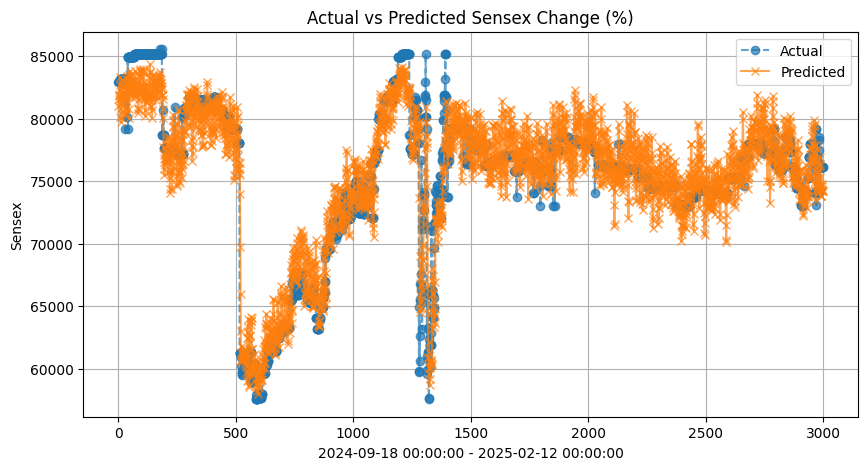

In [111]:
dates_test = merged_df['Date'].iloc[len(X_train) + SEQ_LENGTH:].reset_index(drop=True)
# print(dates_test)
# plt.figure(figsize=(10, 5))
# plt.plot(dates_test, y_test_rescaled, label="Actual", linestyle='-', marker='o', alpha=0.7)
# plt.plot(dates_test, y_pred_rescaled, label="Predicted", linestyle='-', marker='x', alpha=0.7)
# plt.xlabel("Date")
# plt.ylabel("Sensex")
# plt.title("Actual vs Predicted Sensex Change (%)")
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)  # Rotate date labels for readability
# plt.tight_layout()  # Adjust layout to prevent label overlap
# plt.show()

plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled[3000:6000], label="Actual", linestyle='dashed', marker='o', alpha=0.7)
plt.plot(y_pred_rescaled[3000:6000], label="Predicted", linestyle='solid', marker='x', alpha=0.7)
plt.xlabel(f'{dates_test.loc[3000]} - {dates_test.loc[6000]}')
plt.ylabel("Sensex")
plt.title("Actual vs Predicted Sensex Change (%)")
plt.legend()
plt.grid(True)
plt.show()

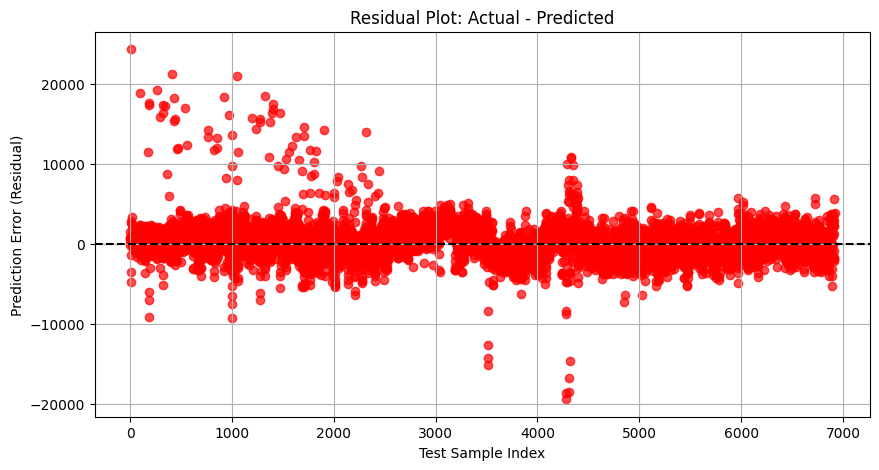

In [110]:
residuals = y_test_rescaled - y_pred_rescaled
plt.figure(figsize=(10, 5))
plt.scatter(range(len(residuals)), residuals, alpha=0.7, color='red')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel("Test Sample Index")
plt.ylabel("Prediction Error (Residual)")
plt.title("Residual Plot: Actual - Predicted")
plt.grid(True)
plt.show()

In [55]:
print(y_pred)

[[61689.793]
 [61693.93 ]
 [61854.41 ]
 ...
 [74504.38 ]
 [78140.53 ]
 [60031.887]]
